# 주식 시세 현황 분석

### 1. 문제정의
1. 이직을 하면서 받은 퇴직금으로 전망 좋은 주식 종목에 투자하기로 결심
2. 주로 방문하는 주식시세 확인 웹 사이트에서 종목을 선택하고 분석하여 결과를 보관하고 싶음

### 2. 배경 지식-1
1. 웹 크로링(Web Crawling)
 - 인터넷 웹 사이트에 돌아다니며, 방문한 페이지의 내용과 링크의 복사본을 생성하여 다운로드 후 요약본을 만듬
 - 네이버, 구글처럼 검색창에 키워드를 입력하면 URL을 지닌 페이지와 외부 사이트 링크도 요약본과 함께 노출
 - 검색엔진이 웹 크롤러가 수집한 데이터에 검색 알고리즘을 적용하여 정보를 추출한 결과임
 
2. 웹 스크래핑(Web Scraping)
 - 특정 웹 사이트나 페이지에서 필요한 데이터를 자동으로 추출해내는 것
 - '스크래퍼 봇'이 특정 웹사이트에 콘텐트를 다운로드하기 위해 HTTP GET 요청을 보내고, HTML 문서를 분석하여 특정 패턴의 데이터 추출
 - 추출한 데이터는 원하느대로 사용할 수 잇도록 데이터베이스에 저장

### 3. 웹 스크래핑
#### 3.1 주식 종목 선택하기
1. 네이버 금융 (https://finance.naver.com/) 데이터를 가져와 활용
2. 삼성전자 주식 정보 검색 - 일별 시세 찾기 (https://finance.naver.com/item/main.naver?code=005930)
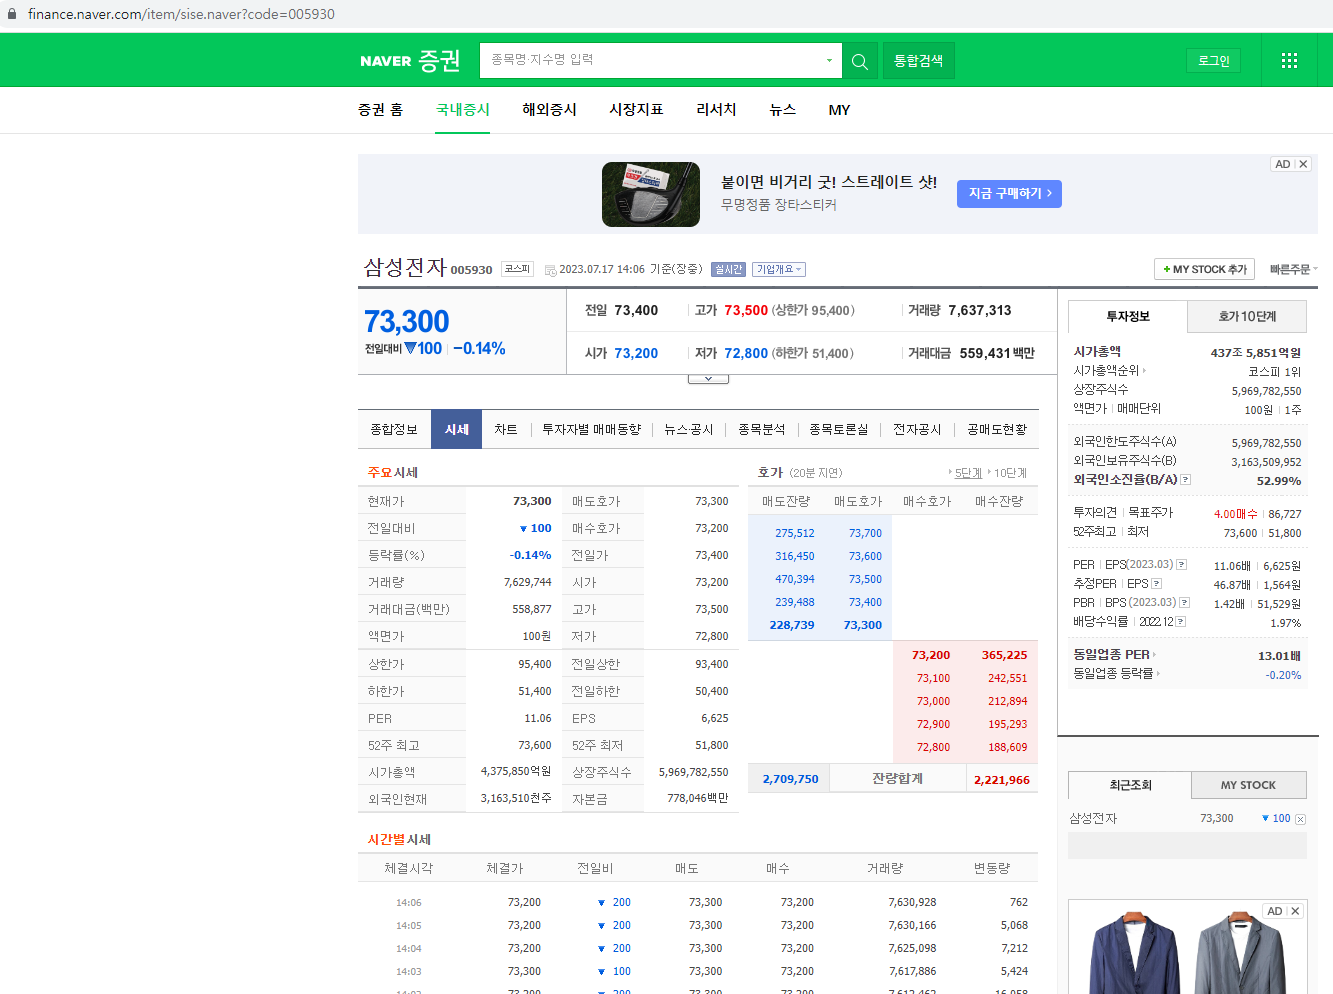


#### 3.2 주식 종목 선택하기
1. 삼성전자 주식 정보 검색 -일일 시세만 별도로 업데이트하는 URL 주소 찾기
2. 웹 브라우저 개발자 도구에서 [검사] - [Network] 탭으로 확인
 - 시세 2번 페이지 클릭시, "sise_day.naver?code=005930&page=2" 확인
 
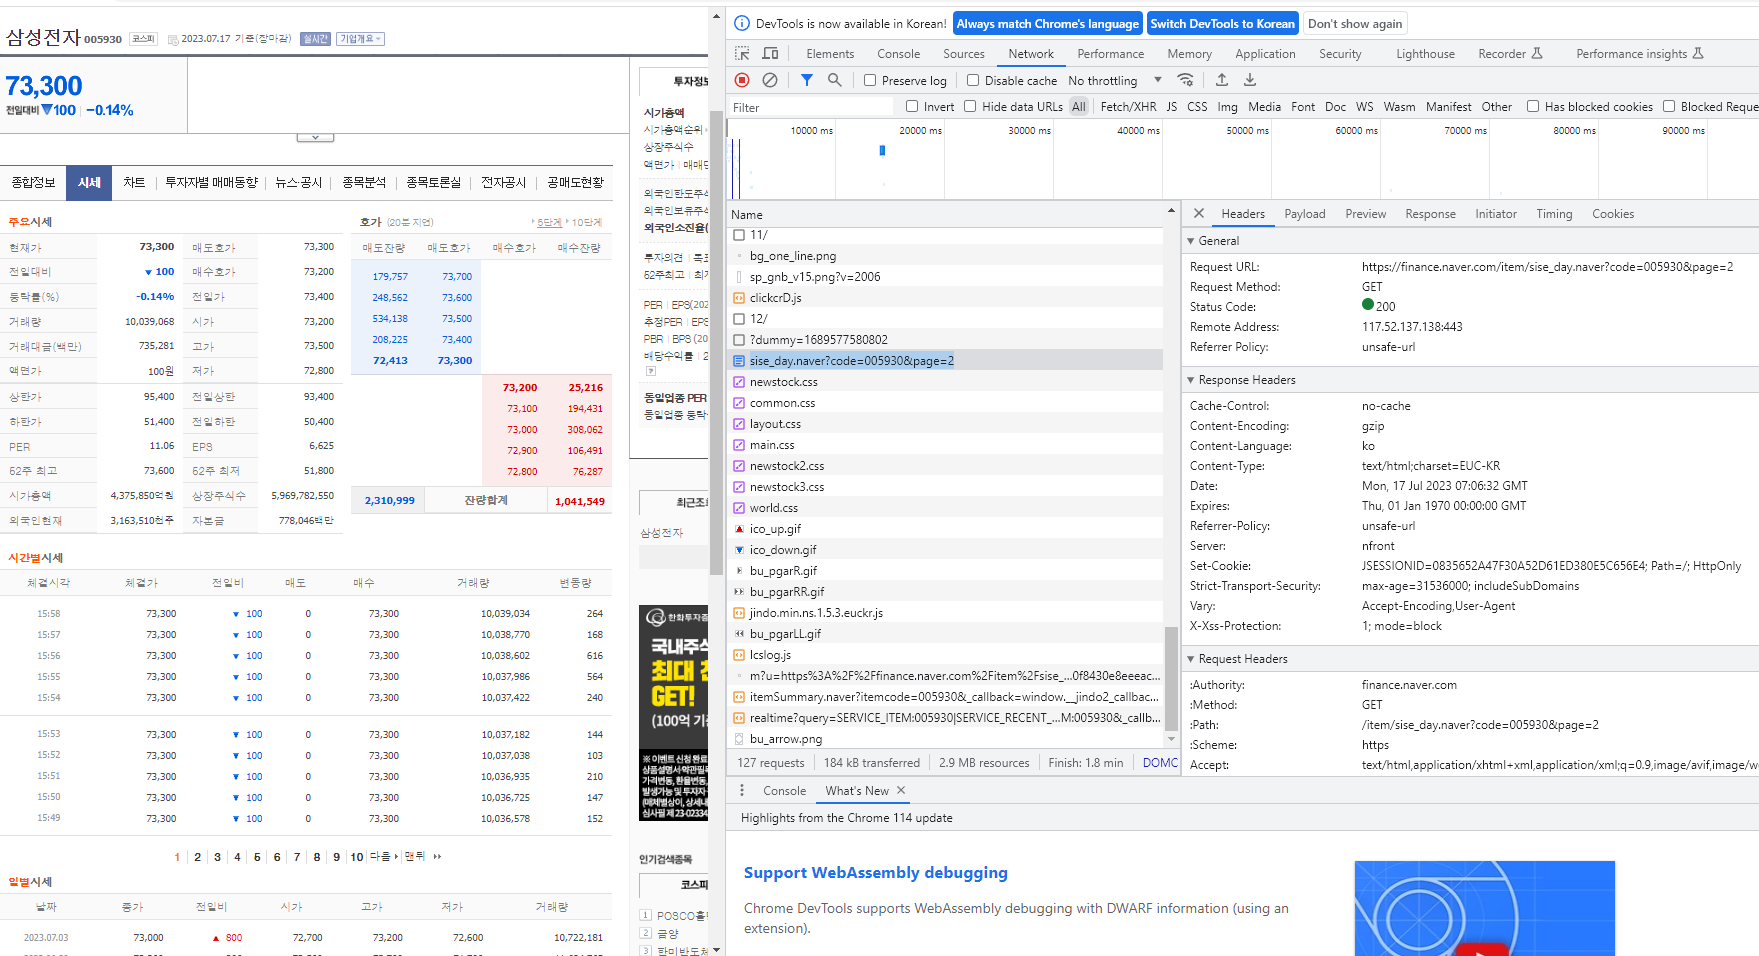

#### 3.3 웹 사이트 동작 방식 -  웹 브라우저에서 페이지 번호 클릭(가령 2페이지)
1. HTTP Request
 - 네이버로 요청 (https://finance.naver.com/item/sise_day.naver?code=005930&page=2)
 - [Headers] 탭 - HTTP 요청 Header (Request URL, path, user-agent 등) 확인하기
 - [Payload] 탭 - HTTP Payload (HTTP 요청을 보낼 때 함께 전송하는 데이터) : 주식코드, 페이지 번호등을 보내고 있음
 
2. HTTP Response
 - [Response] 탭 - 서버가 전송한 HTML 페이지 확인

## 과제 1

### 4. Streamlit으로 주가 시세 분석 프로그램 작성하기

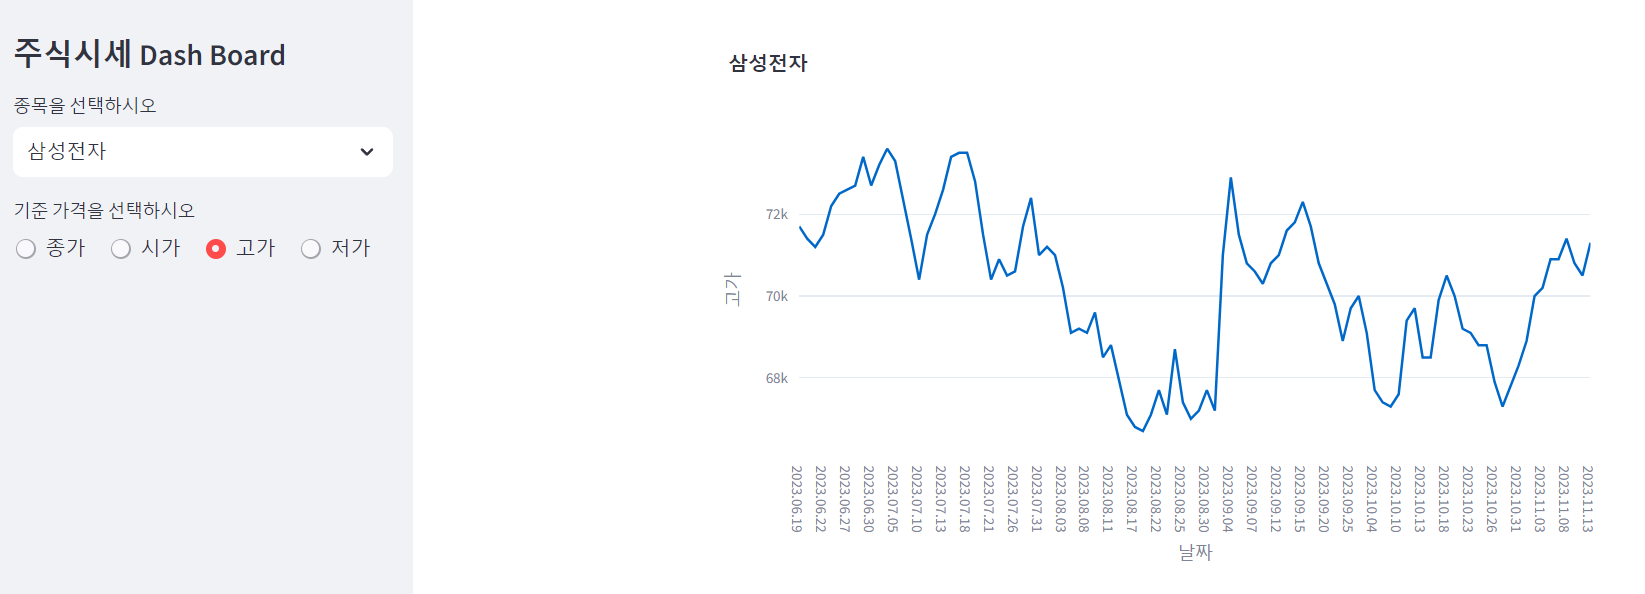

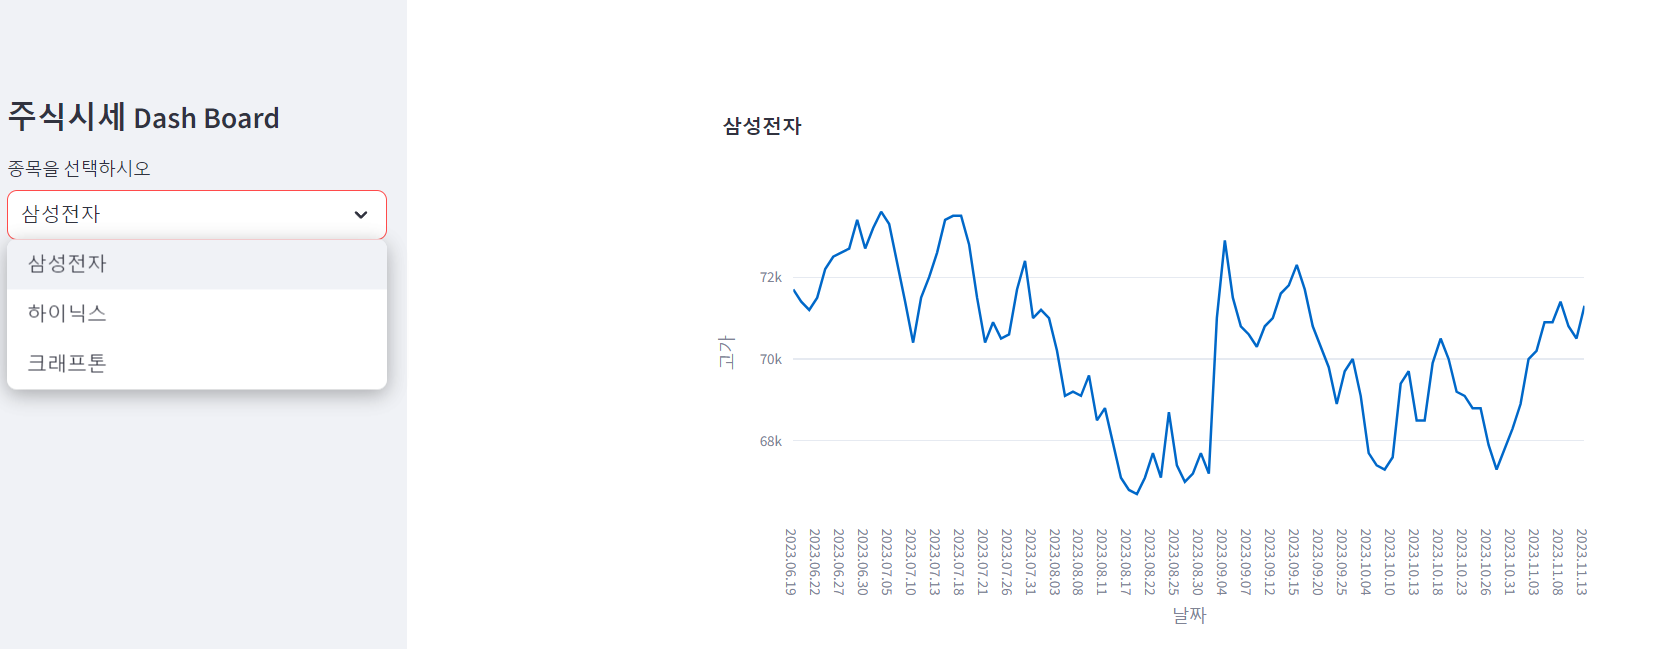

```
# stock.py
import pandas as pd
import streamlit as st
import requests
import plotly.express as px

# sidebar 만들기
st.sidebar.title('주식시세 Dash Board')

# multi selelct
stock_code = {'삼성전자':'005930', '하이닉스':'000660', '크래프톤':'259960'}

stocks = list(stock_code.keys())
select_stock = st.sidebar.selectbox('종목을 선택하시오', stocks)

# radio box
val = ['종가', '시가', '고가', '저가']
select_val = st.sidebar.radio('기준 가격을 선택하시오', val, horizontal=True)

~~~ 완성해 보세요 ~~~

# 전체 숫자 데이터 선 그래프 그리기
all_tables.plot.line()
fig = px.line(
    all_tables,
    x='날짜',
    y=select_val,
    title=select_stock
)
st.plotly_chart(fig)
```

## 과제 2
### 5. Streamlit으로 주가 시세 분석 프로그램 작성하기 - Tab 활용

```
# tab.py
import streamlit as st

# 탭 생성 : 첫번째 탭의 이름은 Tab A 로, Tab B로 표시합니다. 
tab1, tab2= st.tabs(['Tab A' , 'Tab B'])

with tab1:
  #tab A 를 누르면 표시될 내용
  st.write('hello')
    
with tab2:
  #tab B를 누르면 표시될 내용 
  st.write('hi')

```

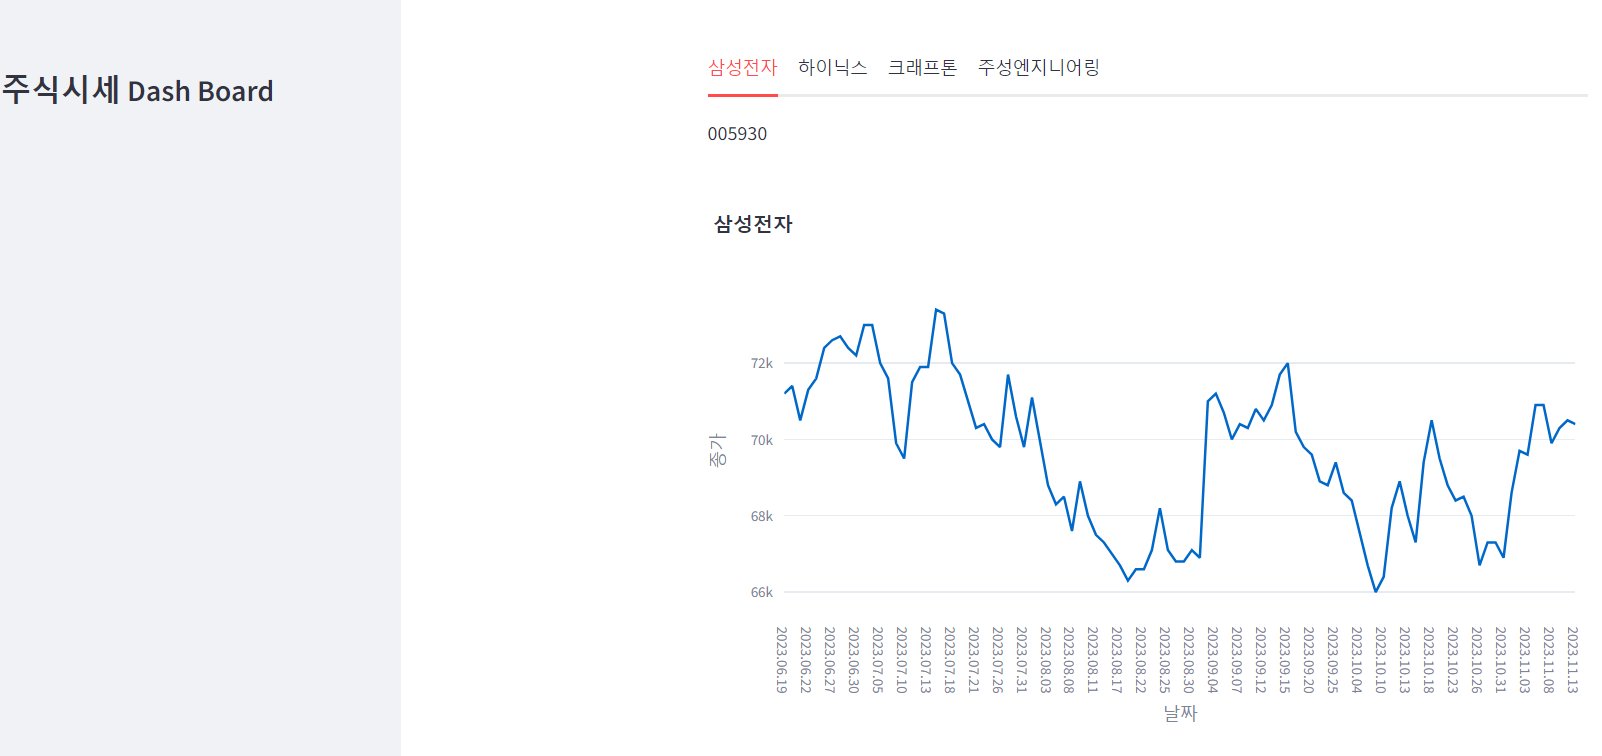

```
import pandas as pd
import streamlit as st
import requests
import plotly.express as px

# sidebar 만들기
st.sidebar.title('주식시세 Dash Board')

# multi selelct
stock_code = {'삼성전자':'005930', '하이닉스':'000660', '크래프톤':'259960', '주성엔지니어링':'036930'}

stocks = list(stock_code.keys())

selected_tab = st.tabs(stocks)

for list_loop in range(len(stocks)):
    with selected_tab[list_loop]:
        s_code = stock_code[stocks[list_loop]]
        st.write(s_code)
        
        ~~~~  완성하시오.~~~
        
        # 전체 숫자 데이터 선 그래프 그리기
        all_tables.plot.line()
        fig = px.line(
            all_tables,
            x='날짜',
            y='종가',
            title=stocks[list_loop]
        )
        st.plotly_chart(fig)
```

## 과제 3

과제 2를 수정하여 '종가', '시가', '고가', '저가'를 선택하여 주식 시세를 알아볼 수 있도록 수정해 보세요